<a href="https://colab.research.google.com/github/jeangomes/eng-soft-mvp2-ESSI/blob/main/MVP_Sprint_EngSoftInteligentes_Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Engenharia de Sistemas de Software Inteligentes
### Dados de autismo para classificação de bebês

Vamos utilizar o poder preditivo das técnicas de aprendizado de máquina na detecção de traços autistas.

As colunas do dataset possuem 10 respostas para algumas perguntas sobre uma criança, a serem respondidadas pelos pais, além de outros atributos que possam estar relacionados a ter ou não traços do Transtorno do Espectro Autista (TEA).








### Importando as bibliotecas utilizadas

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Carregamento do dataset

Dataset adquirido no Kaggle [neste link](https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers/)

Link do dataset: https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers/

Referência sobre as 10 primeiras colunas:
[Q-CHAT-10 Quantitative Checklist for Autism in Toddlers](https://docs.autismresearchcentre.com/tests/QCHAT-10_Portuguese.pdf)


In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jeangomes/estudos-ds/main/dados/Toddler_Autism_dataset_July_2018.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
df.head(15)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


### Pequena análise e pré processamento dos dados


In [3]:
print(df.shape)
print("\n",df.columns)

(1054, 19)

 Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

Verificando se a valores nulos/ausentes

In [5]:
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

Vou deletar a primeira coluna, pois ela é apenas um index dos registros.

In [6]:
df.drop('Case_No', axis=1, inplace=True)
print(df.shape)
print("\n",df.columns)

(1054, 18)

 Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


Renomeando algumas colunas para simplificar

In [7]:
df.rename(columns={'Qchat-10-Score':'score_result', 'Class/ASD Traits ':'target_class'},inplace=True)
print(df.shape)
print("\n",df.columns)

(1054, 18)

 Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'score_result', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'target_class'],
      dtype='object')


In [8]:
df['Jaundice'].value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

In [9]:
df['Family_mem_with_ASD'].value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

In [10]:
df['target_class'].value_counts()

Yes    728
No     326
Name: target_class, dtype: int64

In [11]:
df['Sex'].value_counts()

m    735
f    319
Name: Sex, dtype: int64

Alterando os valores de colunas booleanas onde o valor está em string para inteiro

In [12]:
df['target_class'] = df['target_class'].map({'No':0,'Yes':1})
df['Sex'] = df['Sex'].map({'f':0,'m':1})
df['Jaundice'] = df['Jaundice'].map({'no':0,'yes':1})
df['Family_mem_with_ASD'] = df['Family_mem_with_ASD'].map({'no':0,'yes':1})


In [13]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,score_result,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,target_class
0,0,0,0,0,0,0,1,1,0,1,28,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,0,1,family member,1


Vamos remover outras duas colunas, elas contem valore em string, e a principio são irrelevantes para o treinamento do modelo.

In [14]:
df.drop(['Ethnicity', 'Who completed the test'], axis=1, inplace=True)

Vamos renomear a coluna de idade e converter o valor que está em meses para anos

In [15]:
df.rename(columns={'Age_Mons':'Age'},inplace=True)
df["Age"] = df["Age"] / 12

In [16]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,score_result,Sex,Jaundice,Family_mem_with_ASD,target_class
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,0,1,1


In [17]:
# Verificando a correlação
corr_target = df.corr()['target_class']
sorted_corr = corr_target.sort_values()
print(sorted_corr)

Family_mem_with_ASD   -0.013503
Age                    0.066831
Jaundice               0.074060
Sex                    0.117664
A10                    0.179833
A3                     0.409701
A8                     0.427155
A2                     0.463467
A1                     0.503810
A4                     0.505204
A7                     0.563177
A5                     0.563297
A6                     0.569424
A9                     0.577336
score_result           0.810423
target_class           1.000000
Name: target_class, dtype: float64


Vamos remover por último a coluna sobre o score, pois ela foi usada para atribuir o rótulo da classe de saída

In [18]:
df.drop(['score_result'], axis=1, inplace=True)
df.head(15)
#df.to_csv('mydata_autism.csv', index=False)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_mem_with_ASD,target_class
0,0,0,0,0,0,0,1,1,0,1,2.333333,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,0,0,1,1
5,1,1,0,0,1,1,1,1,1,1,1.750000,1,0,0,1
6,1,0,0,1,1,1,0,0,1,0,2.750000,1,1,0,1
7,0,1,0,0,1,0,1,1,1,1,2.750000,1,1,0,1
8,0,0,0,0,0,0,1,0,0,1,3.000000,1,0,0,0
9,1,1,1,0,1,1,0,1,1,1,1.833333,1,0,0,1


In [19]:
df.shape

(1054, 15)

### Separação em conjunto de treino e conjunto de teste com holdout

In [20]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:14]
y = array[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.944272 (0.020505)
CART: 0.910952 (0.026363)
NB: 0.949006 (0.018431)
SVM: 0.986961 (0.012354)


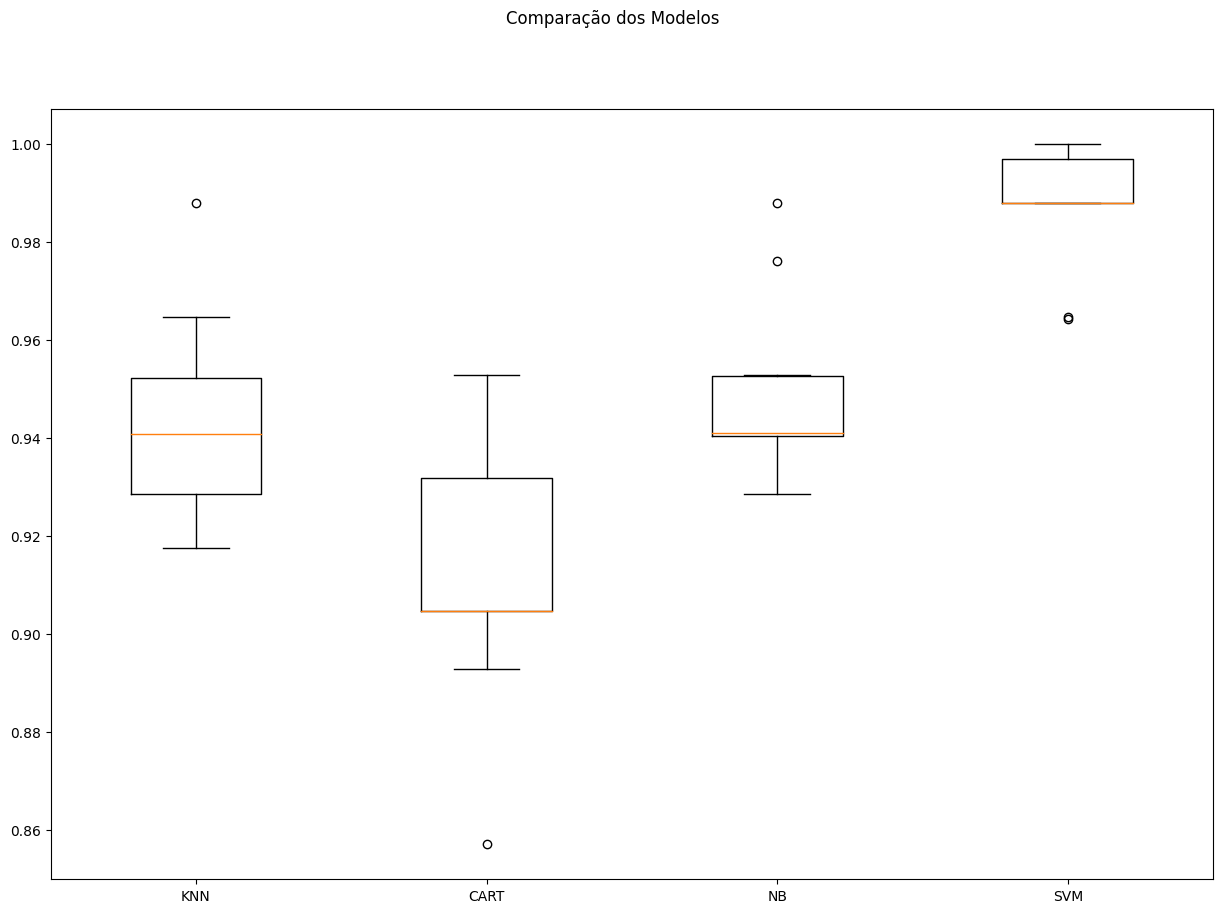

In [21]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.944 (0.021)
CART-orig: 0.911 (0.026)
NB-orig: 0.949 (0.018)
SVM-orig: 0.987 (0.012)
KNN-padr: 0.950 (0.025)
CART-padr: 0.918 (0.025)
NB-padr: 0.949 (0.018)
SVM-padr: 0.979 (0.022)
KNN-norm: 0.957 (0.021)
CART-norm: 0.918 (0.022)
NB-norm: 0.949 (0.018)
SVM-norm: 0.979 (0.019)


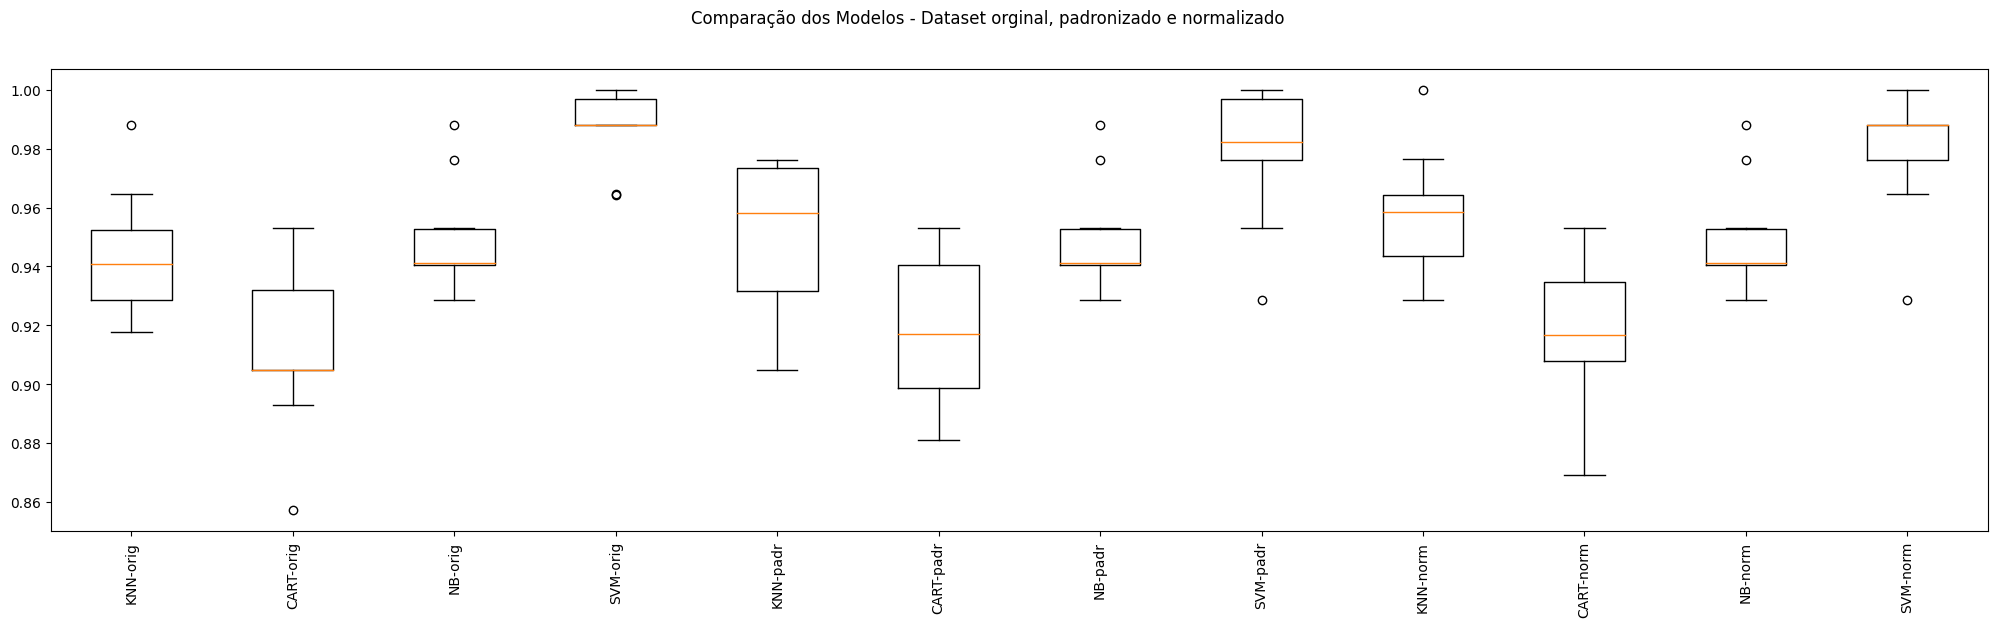

In [22]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [23]:
# Tuning do SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10]
    #'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    #'SVM__kernel': ['rbf', 'poly', 'sigmoid']
}

# Prepara e executa o GridSearchCV // rigidez da margem (parâmetro C). ele assume o valor default C=1
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: svm-orig - Melhor: 1.000000 usando {'SVM__C': 10}
Modelo: svm-padr - Melhor: 0.994062 usando {'SVM__C': 10}
Modelo: svm-norm - Melhor: 0.997619 usando {'SVM__C': 10}


## Finalizando o modelo com o algoritmo que apresentou melhor resultado


In [25]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
model = SVC(C=10) # é necessário passar a rigidez da margem (parâmetro C), senão ele assume o valor default C=1
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [26]:
# Preparação do modelo com TODO o dataset
#scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
#rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(X, y)

SVC(C=10)

## Aplicando o modelo em dados inéditos para simulação

In [33]:
# Novos dados - não sabemos a classe! 7 8
input_data11 = (1,1,1,1,0,1,1,1,0,1,1.4,1,1,0)
input_data8 = (0,	0,	0,	0,	0,	0,	1,	0,	0,	1, 3, 1 , 0, 0)
input_data_as_numpy_array = np.asarray(input_data8)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(input_data_reshaped)
print(input_data_reshaped)

[[0 0 0 0 0 0 1 0 0 1 3 1 0 0]]


In [34]:
# Predição de classes dos dados de entrada
saidas = model.predict(input_data_reshaped)
print(saidas)

[0.]


In [31]:
print(df['target_class'].iloc[8])

0


In [32]:
print(df.iloc[8])

A1                     0.0
A2                     0.0
A3                     0.0
A4                     0.0
A5                     0.0
A6                     0.0
A7                     1.0
A8                     0.0
A9                     0.0
A10                    1.0
Age                    3.0
Sex                    1.0
Jaundice               0.0
Family_mem_with_ASD    0.0
target_class           0.0
Name: 8, dtype: float64


## Exportando o modelo


In [ ]:
# exportando o modelo de classificação treinado para um arquivo
import pickle
pickle_out = open('tea_classificador_svm_orig.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

789
